In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']
sms_raw.head()


,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
sms_raw.dropna(subset=['spam'], inplace=True)

In [92]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [93]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [94]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

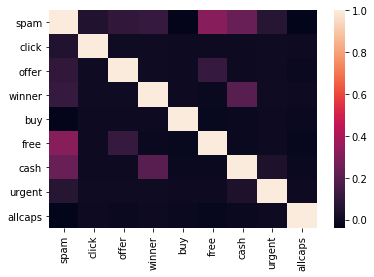

In [95]:
sns.heatmap(sms_raw.corr())

In [96]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [97]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Success rate of our model out of {} : {}".format(
    data.shape[0],
    1-((target != y_pred).sum()/((target != y_pred).sum()+(target == y_pred).sum()))
))

Number of mislabeled points out of a total 5572 points : 604
Success rate of our model out of 5572 : 0.8916008614501076


In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]], dtype=int64)

In [114]:
# Build your confusion matrix and calculate sensitivity and specificity here.
import pandas as pd
y_actu = pd.Series(data=target, name='Actual')
y_pred = pd.Series(data=y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

#Calculate Sensitivity (Correctly identified, true within true)
a = df_confusion.loc[True,True]
b = df_confusion.iloc[1,0:3].sum()
print (a/b)

#Calculate specifity (incorrecly identifie, false wihin the false)
c = df_confusion.loc[False,False]
d = df_confusion.iloc[0, 0:3].sum()
print (c/d)

Predicted  False  True 
Actual                 
False       4770     55
True         549    198
0.265060240964
0.988601036269
